In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os 
import seaborn as sns

In [14]:
glob.glob('/Users/gracecolverd/City_clustering/vis/GMM/5/random_seed_1/*_model.pkl')[0]

'/Users/gracecolverd/City_clustering/vis/GMM/5/random_seed_1/gmm_model.pkl'

In [22]:
import glob 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import joblib

def load_data(base_path,model_class):
    X_principal = pd.read_csv(os.path.join(base_path, 'X_principal.csv'))
    labels = pd.read_csv(os.path.join(base_path, 'labels.csv'))['Cluster']
    pca = joblib.load(os.path.join(base_path, 'pca.pkl'))
    if model_class=='gmm':
        model = joblib.load(os.path.join(base_path, 'gmm_model.pkl'))
    elif model_class=='kmeans':
        model = joblib.load(os.path.join(base_path, 'kmeans_model.pkl'))
    elif model_class=='spectral':
        model = joblib.load(os.path.join(base_path, 'spectral_model_rbf.pkl'))
    return X_principal, labels, pca, model

def plot_2d_clusters(X_principal, labels, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_principal['PC1'], X_principal['PC2'], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

def plot_3d_clusters(X_principal, labels, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_principal['PC1'], X_principal['PC2'], X_principal['PC3'], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    ax.set_title(title)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.show()

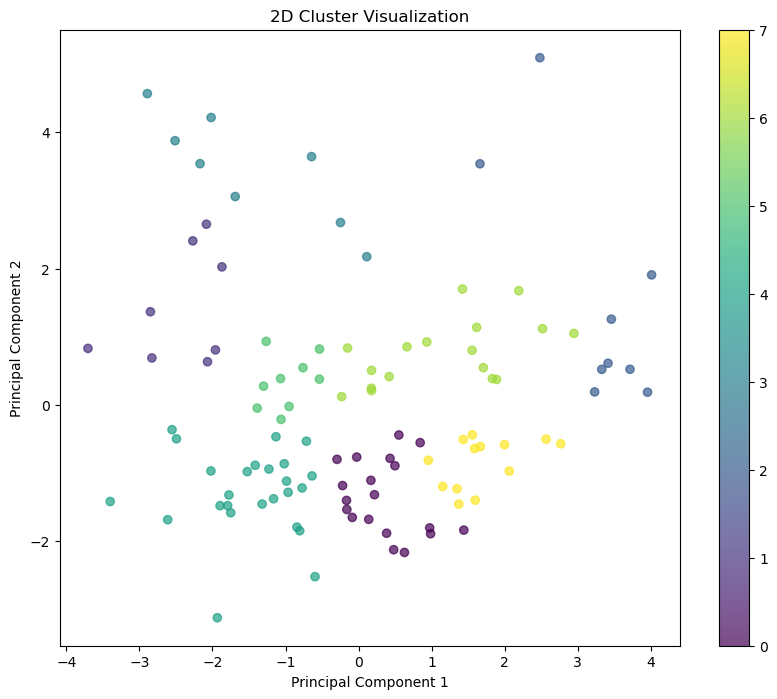

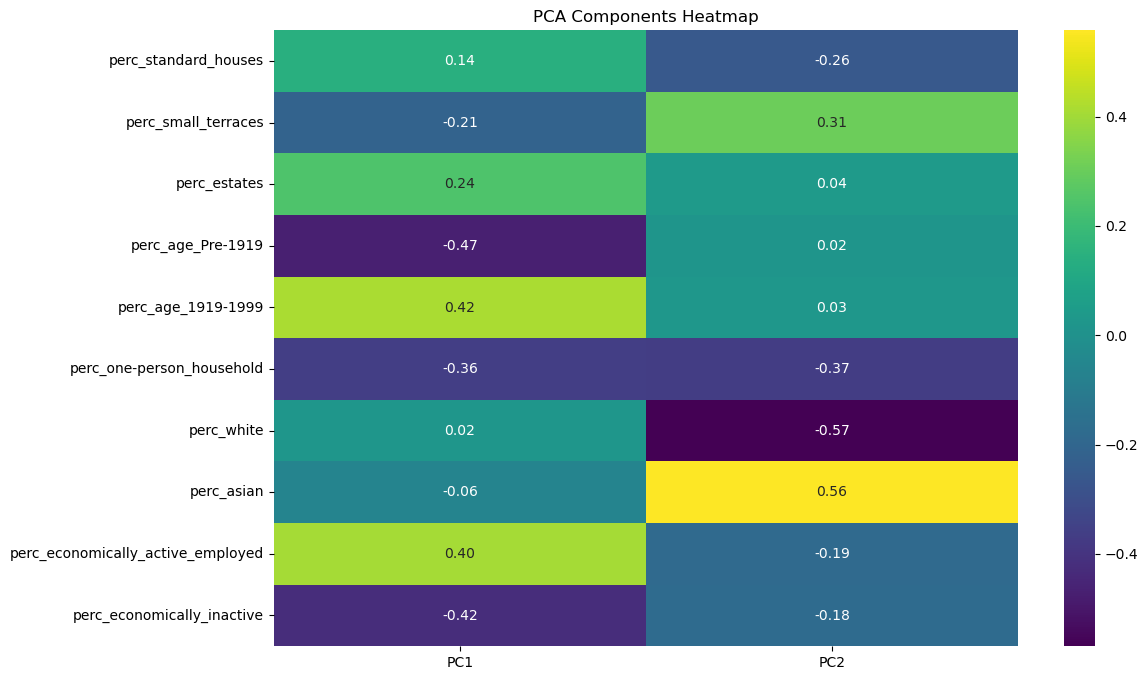

In [23]:

def plot_feature_importance(pca, feature_names):
    components = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=feature_names)
    plt.figure(figsize=(12, 8))
    sns.heatmap(components, cmap='viridis', annot=True, fmt='.2f', cbar=True)
    plt.title('PCA Components Heatmap')
    plt.show()

def visualize_clusters(base_path, model_class):
    X_principal, labels, pca, gmm = load_data(base_path, model_class)
    
    # 2D plot
    plot_2d_clusters(X_principal, labels, '2D Cluster Visualization')
    
    # 3D plot
    if X_principal.shape[1] >= 3:
        plot_3d_clusters(X_principal, labels, '3D Cluster Visualization')
    
    # Feature importance
    feature_names = ['perc_standard_houses', 'perc_small_terraces', 'perc_estates', 'perc_age_Pre-1919',
                     'perc_age_1919-1999', 'perc_one-person_household', 'perc_white', 'perc_asian',
                     'perc_economically_active_employed', 'perc_economically_inactive']
    plot_feature_importance(pca, feature_names)

# Usage
base_path = '/Users/gracecolverd/City_clustering/vis/GMM/8/random_seed_1'
visualize_clusters(base_path, 'gmm')


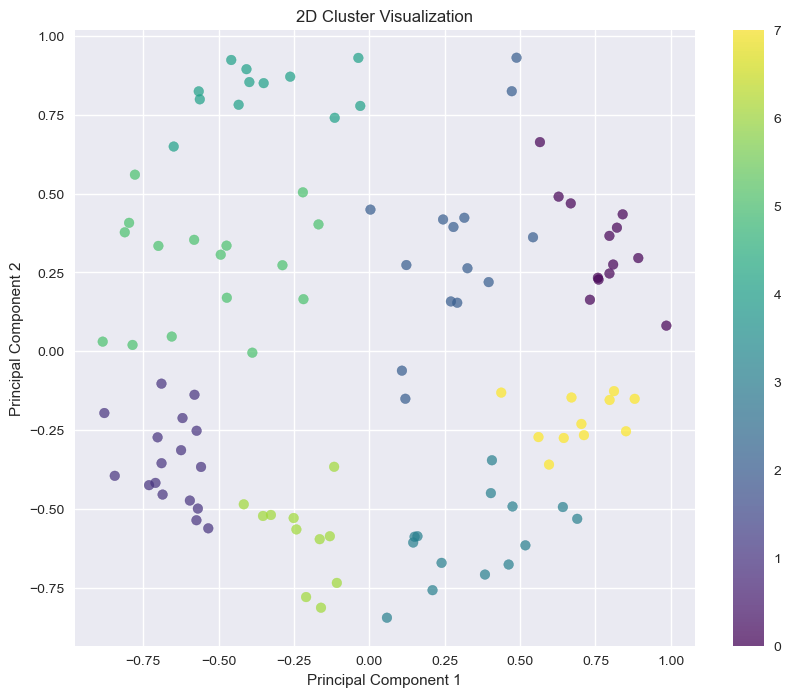

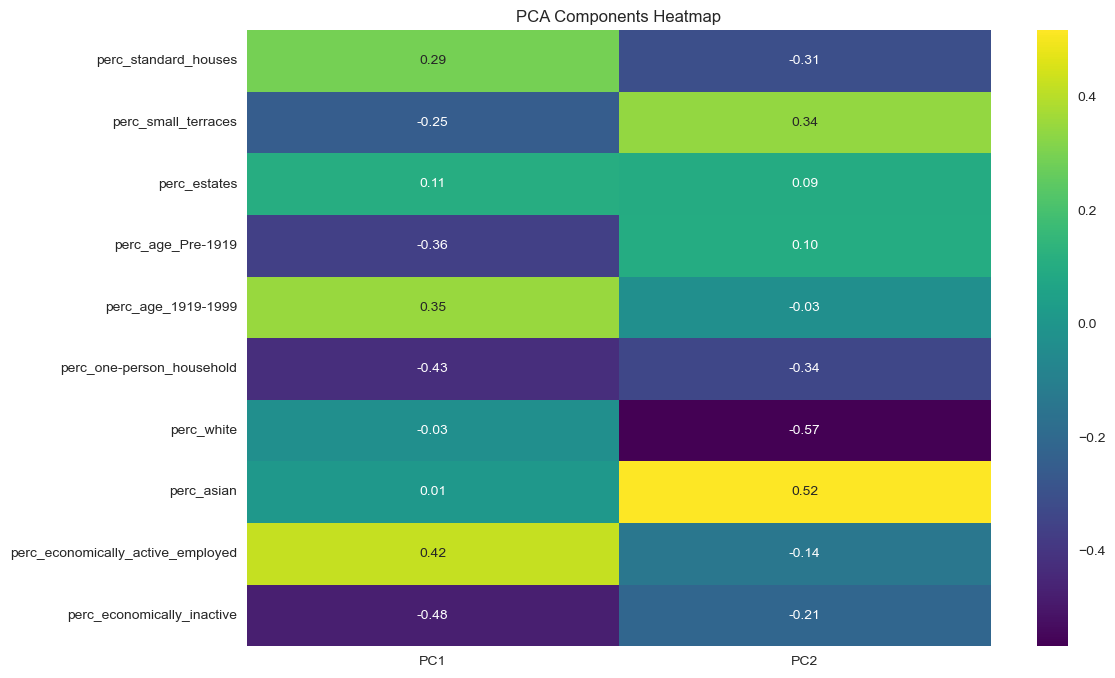

In [26]:
base_path = '/Users/gracecolverd/City_clustering/vis/spectral/8/nearest_neighbors/random_seed_1'
visualize_clusters(base_path, 'spectral')

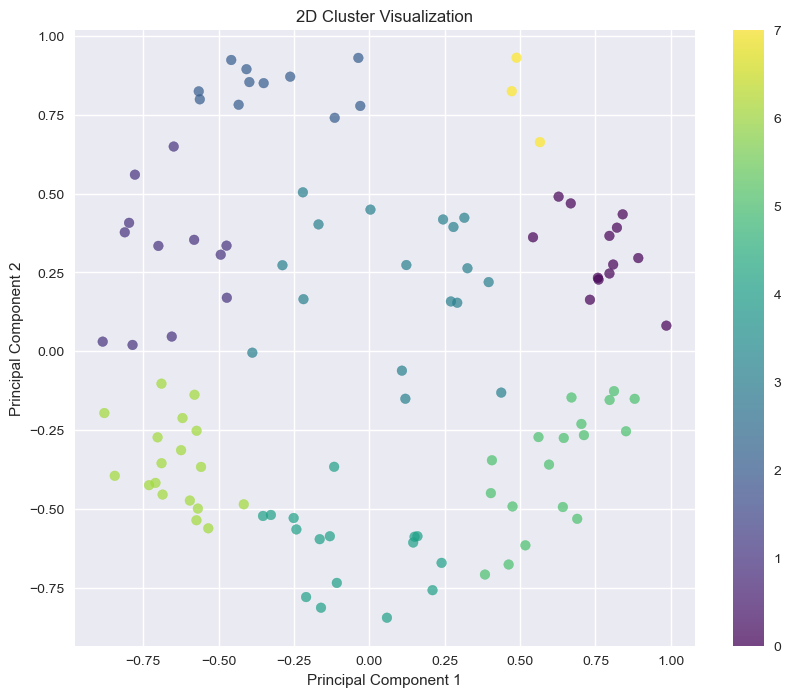

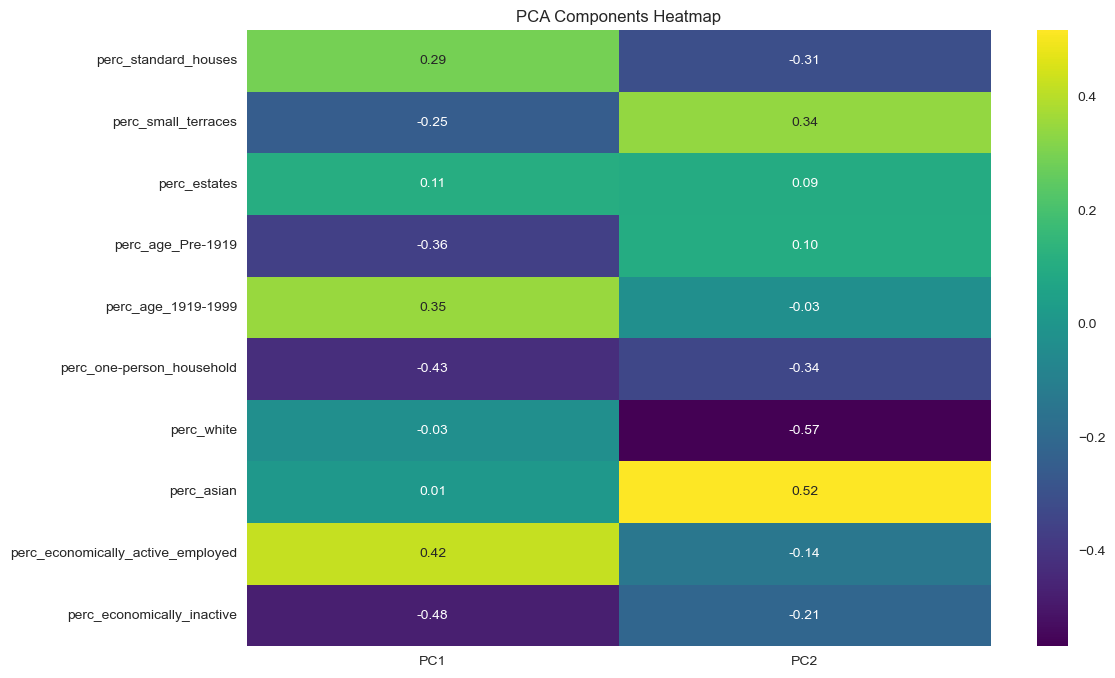

In [27]:
base_path = '/Users/gracecolverd/City_clustering/vis/spectral/8/rbf/random_seed_1'
visualize_clusters(base_path, 'spectral')

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_78718/4288770119.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


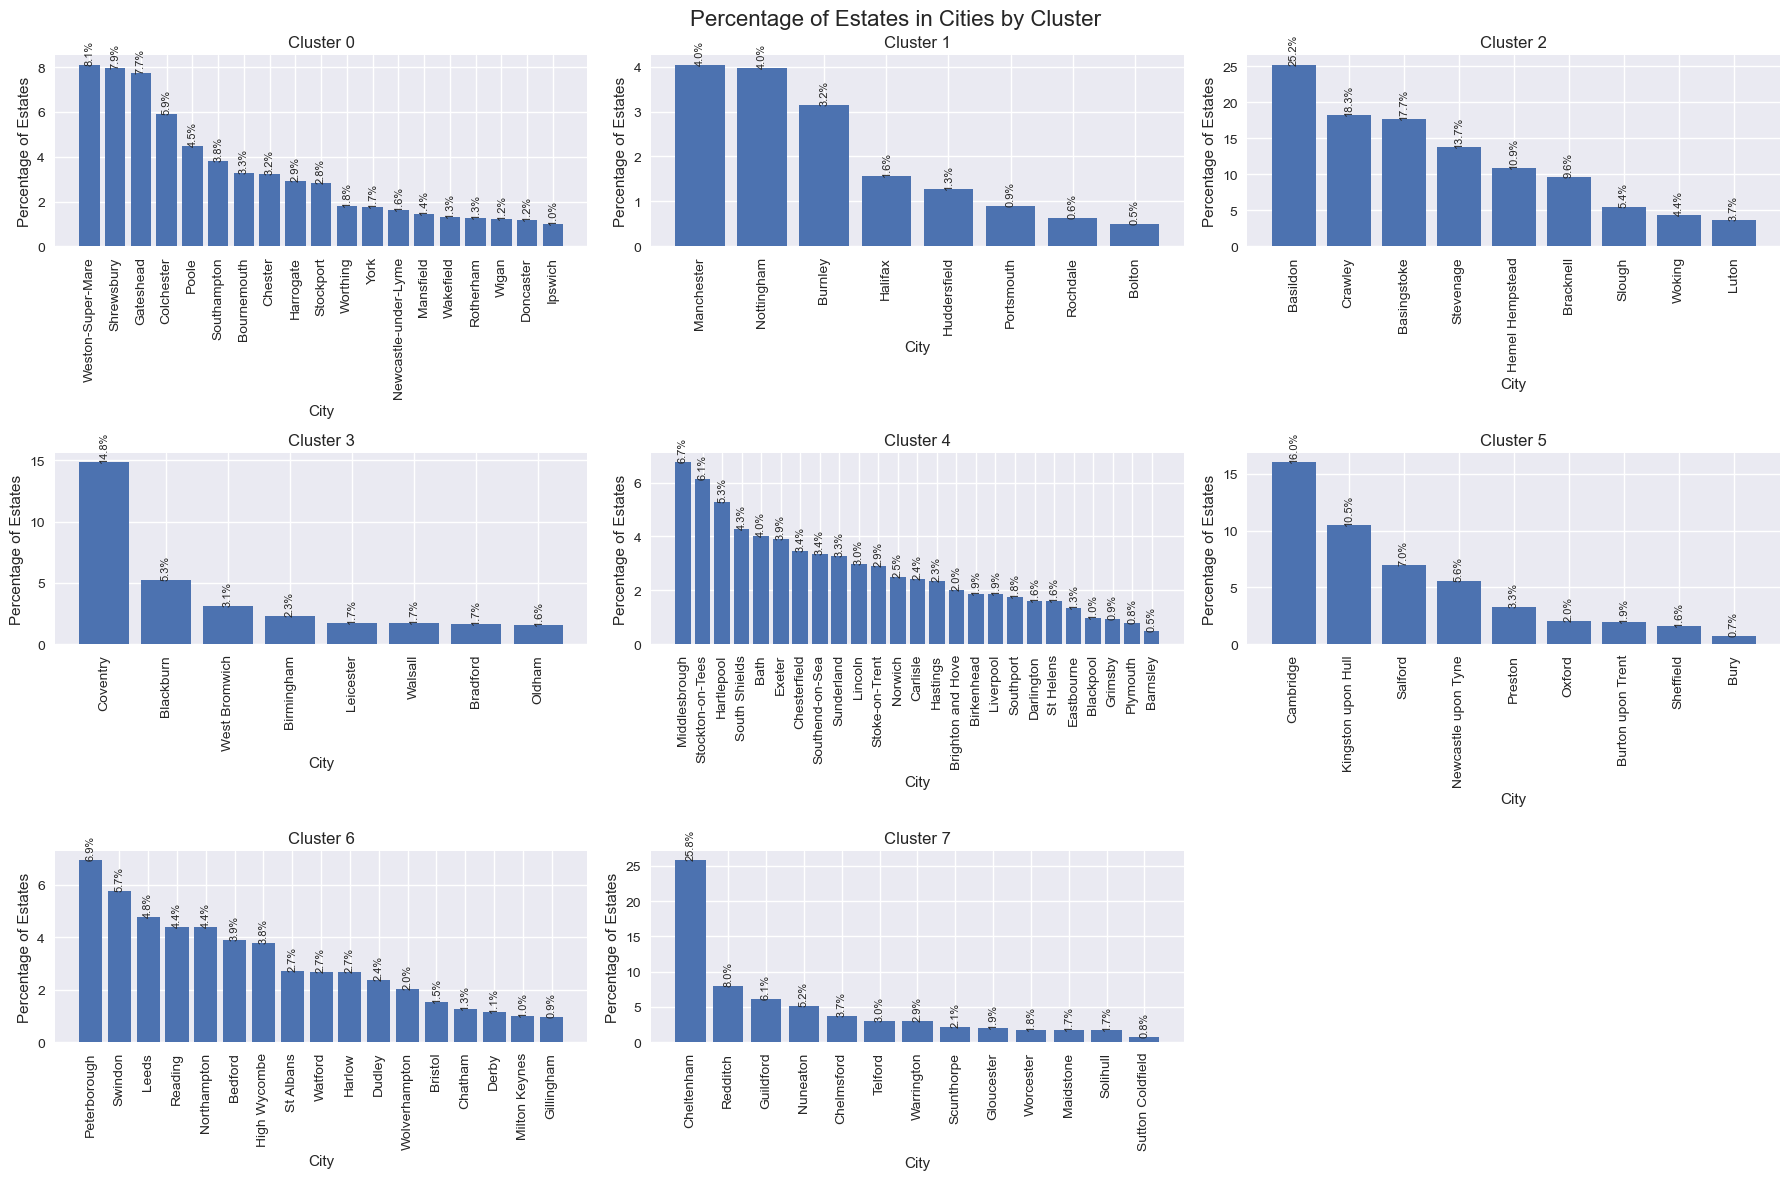

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

def plot_estates_by_cluster(df,col ):
    # Get unique clusters
    clusters = sorted(df[col].unique())
    n_clusters = len(clusters)

    # Calculate the number of rows and columns for subplots
    n_cols = min(3, n_clusters)  # Max 3 columns
    n_rows = math.ceil(n_clusters / n_cols)

    # Set up the plot style
    plt.style.use('seaborn')
    
    # Create a figure with subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
    fig.suptitle('Percentage of Estates in Cities by Cluster', fontsize=16)
    
    # Flatten axs array for easier indexing
    axs = axs.flatten() if n_clusters > 1 else [axs]

    for i, cluster in enumerate(clusters):
        # Filter data for the current cluster
        cluster_data = df[df[col] == cluster].sort_values('perc_estates', ascending=False)
        
        # Create the plot for the current cluster
        bars = axs[i].bar(cluster_data['TCITY15NM'], cluster_data['perc_estates'])
        
        # Customize the subplot
        axs[i].set_title(f'Cluster {cluster}')
        axs[i].set_xlabel('City')
        axs[i].set_ylabel('Percentage of Estates')
        axs[i].tick_params(axis='x', rotation=90)
        
        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            axs[i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.1f}%',
                        ha='center', va='bottom', rotation=90, fontsize=8)

    # Remove any unused subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Usage
df = pd.read_csv("/Users/gracecolverd/City_clustering/resv3_clustering_data.csv" )
labels = pd.read_csv('/Users/gracecolverd/City_clustering/vis/GMM/8/random_seed_1/labels.csv')['Cluster']
df['cluster'] = labels 
plot_estates_by_cluster(df,'cluster')

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_78718/4288770119.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


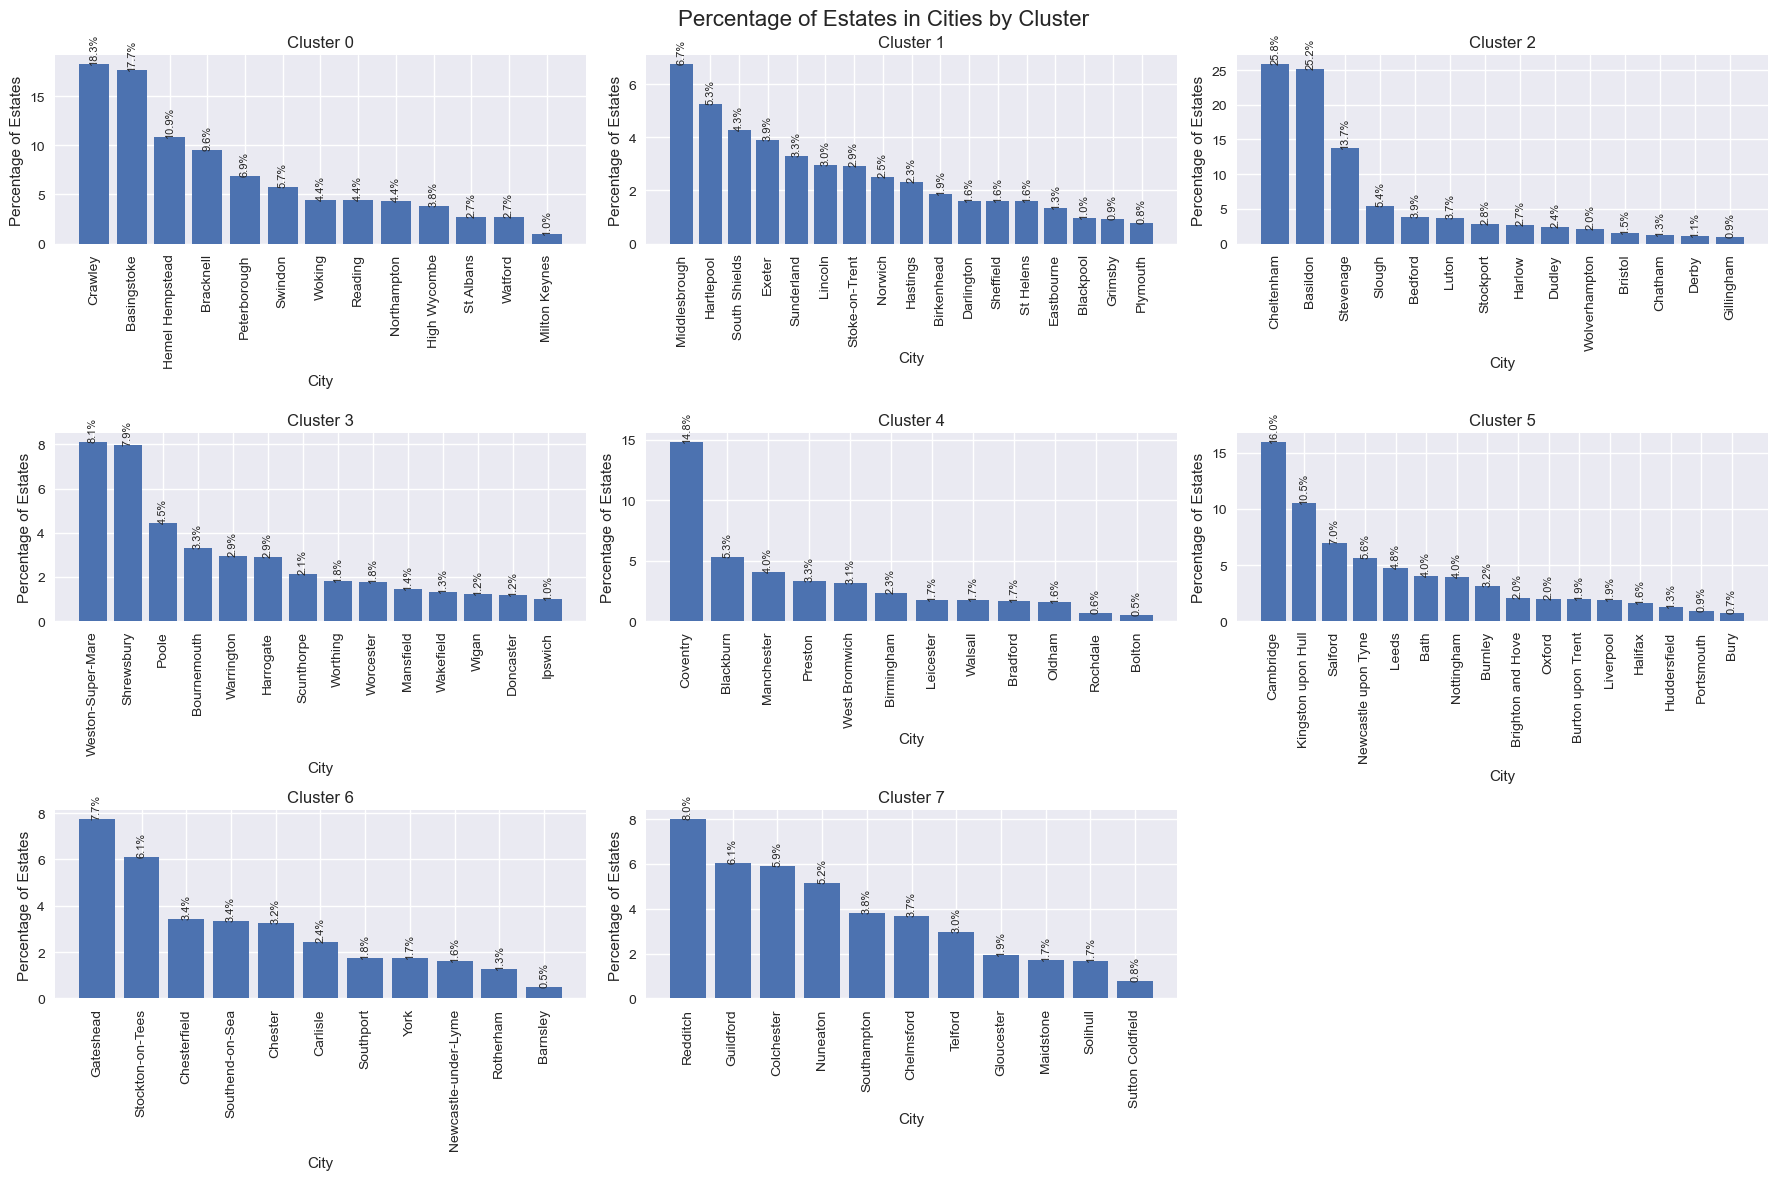

In [28]:
# Usage
df = pd.read_csv("/Users/gracecolverd/City_clustering/resv3_clustering_data.csv" )
labels = pd.read_csv('/Users/gracecolverd/City_clustering/vis/spectral/8/nearest_neighbors/random_seed_1/labels.csv')['Cluster']
df['cluster'] = labels 
plot_estates_by_cluster(df,'cluster')

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_78718/4288770119.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


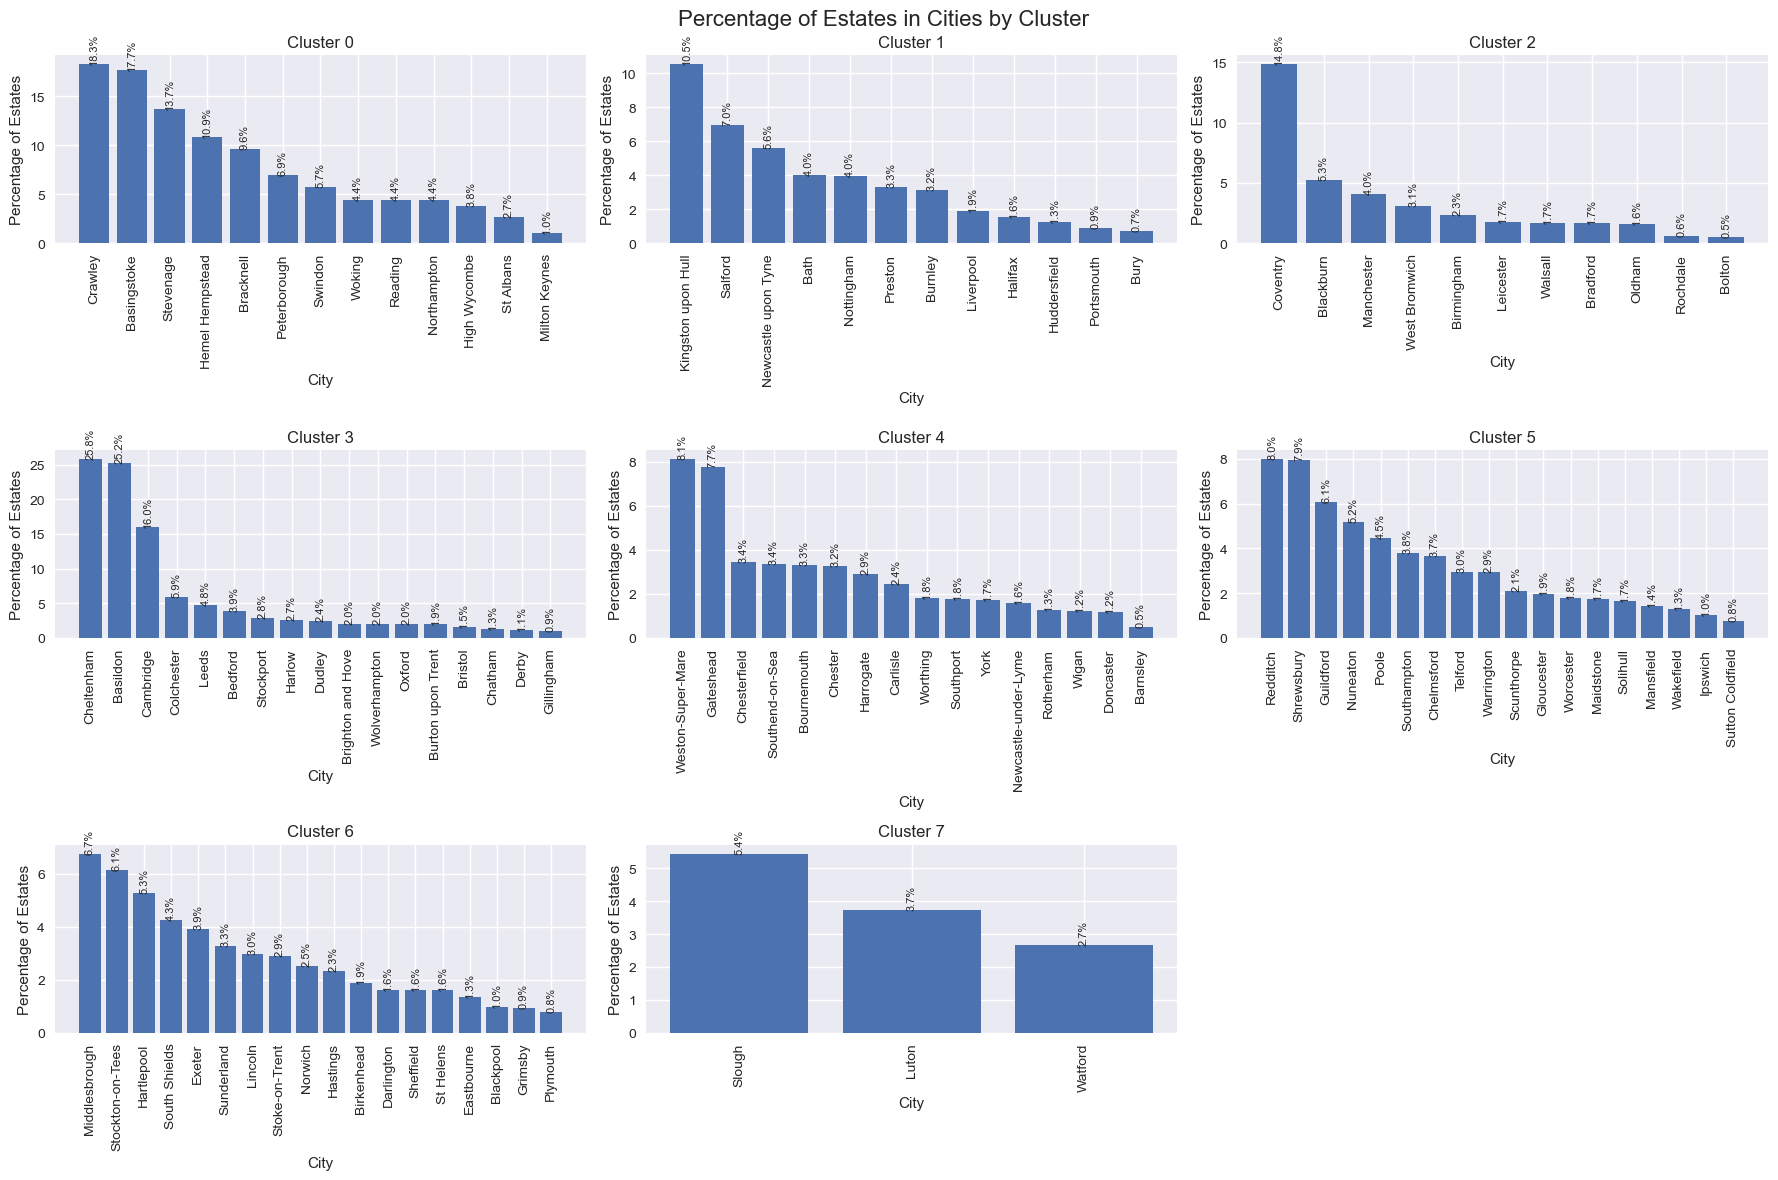

In [29]:
# Usage
df = pd.read_csv("/Users/gracecolverd/City_clustering/resv3_clustering_data.csv" )
labels = pd.read_csv('/Users/gracecolverd/City_clustering/vis/spectral/8/rbf/random_seed_1/labels.csv')['Cluster']
df['cluster'] = labels 
plot_estates_by_cluster(df,'cluster')